참고자료 : [데이터사이언스 스쿨](https://datascienceschool.net/view-notebook/3e7aadbf88ed4f0d87a76f9ddc925d69/)

In [1]:
import numpy as np
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.linear_model import SGDClassifier
from sklearn.svm import LinearSVC
from tensorflow.keras.datasets import imdb
from konlpy.tag import Twitter  # konlpy 설치필요
from konlpy.tag import Okt
from konlpy.tag import Kkma 
from konlpy.tag import Twitter
from pprint import pprint
import nltk   # 설치 필요
from nltk.classify.scikitlearn import SklearnClassifier
from wordcloud import WordCloud, STOPWORDS      # wordcloud 설치필요
from gensim import corpora, models      # 설치필요
import numpy  as np
from PIL import Image
from wordcloud import ImageColorGenerator
import glob
import re
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
%matplotlib inline


## 1. Char코드 기반의 NLP
### 유니코드
- 각 글자들은 유니코드를 갖고 있음.
- 코드값의 범위가 있기 때문에 범위를 보고 대충 어떤 언어인지 알 수 있음
- 영어와 한글은 범위가 다르기 때문에 범위만 보고 분류가 가능하지만
- 같은 알파벳을 쓰는 영어와 스페인어는 분류가 불가
- 유니코드는 총 65536개이기 때문에 어떤 문자든 한 글자당 65536차원 배열을 가짐

## Naive Bayes

Naive Bayes methods are a set of supervised learning algorithms based on applying Bayes’ theorem with the “naive” assumption of conditional independence between every pair of features given the value of the class variable. Bayes’ theorem states the following relationship, given class variable $y$ and dependent feature vector $x_1$ through $x_n$ :

\begin{align}
P(y \mid x_1, \dots, x_n) = \frac{P(y) P(x_1, \dots x_n \mid y)}
                                 {P(x_1, \dots, x_n)}
                                 
\end{align}
Using the naive conditional independence assumption that

\begin{align}
P(x_i | y, x_1, \dots, x_{i-1}, x_{i+1}, \dots, x_n) = P(x_i | y),
\end{align}

for all , this relationship is simplified to

\begin{align}
P(y \mid x_1, \dots, x_n) = \frac{P(y) \prod_{i=1}^{n} P(x_i \mid y)}
                                 {P(x_1, \dots, x_n)}
\end{align}

Since $P(x_1, \dots, x_n)$ is constant given the input, we can use the following classification rule:

\begin{align}
\begin{aligned}
P(y \mid x_1, \dots, x_n) \propto P(y) \prod_{i=1}^{n} P(x_i \mid y)\\\Downarrow\\\hat{y} = \arg\max_y P(y) \prod_{i=1}^{n} P(x_i \mid y),
\end{aligned}
\end{align} 

and we can use Maximum A Posteriori (MAP) estimation to estimate $P(y)$ and $P(x_i \mid y)$
; the former is then the relative frequency of class $y$ in the training set.

The different naive Bayes classifiers differ mainly by the assumptions they make regarding the distribution of $P(x_i \mid y)$
.

In spite of their apparently over-simplified assumptions, naive Bayes classifiers have worked quite well in many real-world situations, famously document classification and spam filtering. They require a small amount of training data to estimate the necessary parameters. (For theoretical reasons why naive Bayes works well, and on which types of data it does, see the references below.)

Naive Bayes learners and classifiers can be extremely fast compared to more sophisticated methods. The decoupling of the class conditional feature distributions means that each distribution can be independently estimated as a one dimensional distribution. This in turn helps to alleviate problems stemming from the curse of dimensionality.

On the flip side, although naive Bayes is known as a decent classifier, it is known to be a bad estimator, so the probability outputs from `predict_proba` are not to be taken too seriously.

**References**:

H. Zhang (2004). The optimality of Naive Bayes. Proc. FLAIRS.

### 1.1 GaussianNB
[GaussianNB](https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.GaussianNB.html#sklearn.naive_bayes.GaussianNB) implements the Gaussian Naive Bayes algorithm for classification. The likelihood of the features is assumed to be Gaussian:

\begin{align}
P(x_i \mid y) = \frac{1}{\sqrt{2\pi\sigma^2_y}} \exp\left(-\frac{(x_i - \mu_y)^2}{2\sigma^2_y}\right)
\end{align}

The parameters $\sigma_y$ and $\mu_y$ are estimated using maximum likelihood.

### 1.1 GaussianNB 분류기
- 평균(mean), 표준편차(standard deviation)을 이용
    - 데이터들끼리 거리를 모두 비교하는 K-nearest Neighbor) 방법도 있지만 overfitting이 심해서 잘 안쓰고 Gaussian을 씀

- 정규화해서
    - 샘플데이터를 평균으로 모델링해서
    - class간에 평균, 표준편차를 이용해서
    - 데이터가 어느 class에 가까운지 비교하기
    - 정규화해서 mean, standard deviation을 구하면 -> 확률값을 구할 수 있음
    - class간 속할 확률을 구해서, 큰 쪽으로 분류하면 됌
    
- 학습시킨다는 의미
    - 평균, 분산을 구한다는 의미
    - 데이터가 1개면 그 데이터가 평균이 됌
    - K-nearest Neighbors 학습이 필요 없음
    
- y 값
    - 딥러닝에서 err를 계산하기 위해 반드시 숫자였어야 함.
    - 이 분류기에서는 참고하는 역할만 하기 때문에 숫자가 아니어도 됌

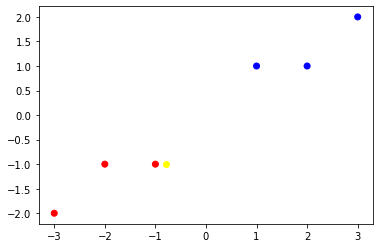

In [2]:
#X = np.array([[-1, -1], [3, 2]])
#Y = np.array([1,  2])

X = np.array([[-1, -1], [-2, -1], [-3, -2], [1, 1], [2, 1], [3, 2]])
Y = np.array([1, 1, 1, 2, 2, 2])
Y2 = ['r', 'r', 'r', 'b', 'b', 'b']


color = [ 'red' if y == 1 else 'blue' for y in Y]
plt.scatter(X[:, 0], X[:, 1], color=color)


t = np.array([[-0.8, -1]])
plt.scatter(t[:,0], t[:,1], color='yellow')

In [3]:
# 학습하기
clf = GaussianNB()  
clf.fit(X,Y)

# 추정하기
print(clf.predict([[-0.8, -1]]))
print(clf.predict([[2.5, 1.3], [0,0]]))
print('\n')


# 학습하기
clf.fit(X,Y2)

# 추정하기
print(clf.predict([[-0.8, -1]]))
print(clf.predict([[2.5, 1.3], [0,0]]))

[1]
[2 1]


['r']
['b' 'b']


---

### 한국어, 일어, 영어, 중국어 인식

In [4]:
# 학습 전용 데이터 준비하기

ko_str = '이것은 한국어 문장입니다.'
ja_str = 'これは日本語 文章です。'
en_str = 'This is English Sentences.'
ch_str = '统一码'

In [5]:
print(ko_str[0])

이


### ord() 
> Return the Unicode code point for a one-character string.

In [6]:
#  숫자값들의 분포가 확연하게 다름을 알 수 있음
print(ord(ko_str[0]))
print(ord(ja_str[0]))
print(ord(en_str[0]))
print(ord(ch_str[0]))

51060
12371
84
32479


In [7]:
# Unicode 코드 포인트로 출현 빈도 판정하는 함수 만들기
# 이건 글자의 위치에 관계 없는 함수 (예를들면, '홈런'과 '런홈'의 함수값이 똑같음)
def count_codePoint(str):
    
    counter = np.zeros(65535)   # Unicode 코드 포인트를 저장할 배열 준비하기
    
    for i in range(len(str)):    
        code_point = ord(str[i])   # 각 문자를 Unicode 코드 포인트로 변환하기
        if code_point > 65535 :
            continue
            
        counter[code_point] += 1    # 출현 횟수 세기
        
    counter = counter/len(str)     # 각 요소를 문자 수로 나눠 정규화하기
    
    return counter

In [8]:
x_train = [count_codePoint(ko_str),
           count_codePoint(ja_str),
           count_codePoint(en_str)]
y_train = ['ko','ja','en']

In [9]:
count_codePoint("밝다")

array([0., 0., 0., ..., 0., 0., 0.])

In [10]:
print(x_train[0])   # 이렇게 하면 잘 안보임
print(np.where((x_train[0] > 0)))
print('\n')

idx = np.where((x_train[0] > 0))
data = x_train[0]

print(data[idx])

[0. 0. 0. ... 0. 0. 0.]
(array([   32,    46, 44163, 44397, 45768, 45796, 47928, 50612, 51008,
       51060, 51077, 51109, 54620], dtype=int64),)


[0.14285714 0.07142857 0.07142857 0.07142857 0.07142857 0.07142857
 0.07142857 0.07142857 0.07142857 0.07142857 0.07142857 0.07142857
 0.07142857]


---

### GaussianNB를 이용하여 언어 분류하기

In [11]:
# 학습하기
clf = GaussianNB() 
clf.fit(x_train, y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [13]:
# 아무 언어도 없는 것도 평가가 된다????
y_pred = clf.predict([count_codePoint(' ')])
print(y_pred)

['ko']


In [14]:
# 평가 전용 데이터 준비하기
ko_test_str = '안녕. 어디야'
ja_test_str = 'こんにちは'
en_test_str = 'Hello'
x_test = [count_codePoint(en_test_str),count_codePoint(ja_test_str),count_codePoint(ko_test_str)]
y_test = ['en', 'ja', 'ko']

# 평가하기
y_pred = clf.predict(x_test)
print(y_pred)
print("정답률 = " , accuracy_score(y_test, y_pred))

['en' 'ja' 'ko']
정답률 =  1.0


In [15]:
# 위의 셀과 다른 데이터로 실험하기
ko_test_str = '안녕'
ja_test_str = 'こんにちは'
en_test_str = 'Hello'
x_test = [count_codePoint(en_test_str),count_codePoint(ja_test_str),count_codePoint(ko_test_str)]
y_test = ['en', 'ja', 'ko']

# 평가하기
y_pred = clf.predict(x_test)
print(y_pred)
print("정답률 = " , accuracy_score(y_test, y_pred))

['en' 'ja' 'ja']
정답률 =  0.6666666666666666


---

- 문자set이 동일한 경우

In [16]:
# 학습 데이터 준비하기 --- (*1)
x_train = []
y_train = []
for file in glob.glob('./train/*.txt'): # glob.glob() : 파일들의 목록으로 리스트를 구성함
    # 언어 정보를 추출하고 레이블로 지정하기 --- (*2)
    print(file)
    y_train.append(file[8:10]) # y_train에 de, en, es 등을 추출해냄
    
    # 파일 내부의 문자열을 모두 추출한 뒤 빈도 배열로 변환한 뒤 입력 데이터로 사용하기 --- (*3)
    file_str = ''
    for line in open(file, 'r', encoding='UTF8'):
        file_str = file_str + line  # file에서 한 줄씩 추출해서 이어붙이는 작업
    x_train.append(count_codePoint(file_str))

./train\de_cat.txt
./train\de_dog.txt
./train\de_elephant.txt
./train\en_cat.txt
./train\en_dog.txt
./train\en_elephant.txt
./train\es_cat.txt
./train\es_dog.txt
./train\es_elephant.txt


In [17]:
# 학습하기
clf = GaussianNB() 
clf.fit(x_train, y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [18]:
# 평가하기
y_pred = clf.predict([count_codePoint('hello. my name is ')])
print(y_pred)

['de']


---

## 2. 단어 빈도수 기반 자연어 처리
- 단어 빈도수 기반

In [19]:
a = ["he", "123", "45"]
b = "".join(a)
print(b)

c = ":".join(a)
print(c)

he12345
he:123:45


In [20]:
corpus = [
    'you know I want your love',
    'I like you',
    'what should I do'
]



In [21]:
str = " ".join(corpus)
print(str)

words = str.split(" ")   # parsing
print('words = ', words)
print('\n')

freq = {}               # dictionary는 반드시 초기화 해준 상태에서 해야함
for word in words:
    freq[word] = freq.get(word, 0 ) + 1    # ferq.get(word, 0) : freq[word]가 정의가 안되어 있으면 0으로 출력하는 것!
    
print('freq = ', freq)
print(freq["you"])

you know I want your love I like you what should I do
words =  ['you', 'know', 'I', 'want', 'your', 'love', 'I', 'like', 'you', 'what', 'should', 'I', 'do']


freq =  {'you': 2, 'know': 1, 'I': 3, 'want': 1, 'your': 1, 'love': 1, 'like': 1, 'what': 1, 'should': 1, 'do': 1}
2


### CountVectorizer
>CountVectorizer는 다음과 같은 세가지 작업을 수행한다.
- 문서를 토큰 리스트로 변환한다.
- 각 문서에서 토큰의 출현 빈도를 센다.
- 각 문서를 BoW(Bag of Words) 인코딩 벡터로 변환한다.
- 순서는 상관없음(바로 밑의 셀에서 what should와 should what을 비교해보면 앎)

CountVectorizer는 이러한 작업을 하기 위한 다음과 같은 인수를 가질 수 있다.

- stop_words : 문자열 {‘english’}, 리스트 또는 None (디폴트)
    - stop words 목록.‘english’이면 영어용 스탑 워드 사용.
- analyzer : 문자열 {‘word’, ‘char’, ‘char_wb’} 또는 함수
    - 단어 n-그램, 문자 n-그램, 단어 내의 문자 n-그램
- token_pattern : string
    - 토큰 정의용 정규 표현식
- tokenizer : 함수 또는 None (디폴트)
    - 토큰 생성 함수 .
- ngram_range : (min_n, max_n) 튜플
    - n-그램 범위
- max_df : 정수 또는 [0.0, 1.0] 사이의 실수. 디폴트 1
    - 단어장에 포함되기 위한 최대 빈도
- min_df : 정수 또는 [0.0, 1.0] 사이의 실수. 디폴트 1
    - 단어장에 포함되기 위한 최소 빈도

출처 : [데이터 사이언스 스쿨](https://datascienceschool.net/view-notebook/3e7aadbf88ed4f0d87a76f9ddc925d69/)

In [22]:
corpus = [
    'you know I want your love love love',
    'I like you like',
    'what should',
    'should what'
]

In [23]:
vector = CountVectorizer()
# print(vector)  # 이건 별 정보 아님

tf = vector.fit_transform(corpus) # 각 문장을 counter vector로 변환(구체적으로는 tf.toarray())
print(vector.vocabulary_) # 각 단어마다 부여한 인덱스를 표시함        # 'I' 같이 짧은 단어는 제외됌

print(tf)     # (문장index, 단어 index) -  문장에서 단어가 나온 횟수
print('\n')

print(tf.toarray())  # sparse matrix 표현으로
print('\n')

print(tf.shape)  # (문장 총 갯수, 인식된 단어 총 갯수)

{'you': 6, 'know': 0, 'want': 4, 'your': 7, 'love': 2, 'like': 1, 'what': 5, 'should': 3}
  (0, 6)	1
  (0, 0)	1
  (0, 4)	1
  (0, 7)	1
  (0, 2)	3
  (1, 6)	1
  (1, 1)	2
  (2, 5)	1
  (2, 3)	1
  (3, 5)	1
  (3, 3)	1


[[1 0 3 0 1 0 1 1]
 [0 2 0 0 0 0 1 0]
 [0 0 0 1 0 1 0 0]
 [0 0 0 1 0 1 0 0]]


(4, 8)


In [24]:
print(vector.vocabulary_)  # 각 단어마다 부여한 인덱스를 표시함  # 'I' 같이 짧은 단어는 제외됌
print(vector.vocabulary_['you'])  # 'you'라는 단어의 index
print(vector.vocabulary_.get('you')) 

{'you': 6, 'know': 0, 'want': 4, 'your': 7, 'love': 2, 'like': 1, 'what': 5, 'should': 3}
6
6


In [25]:
words = vector.get_feature_names()     # 어휘집 생산
print(words)
for word in words : print(word)
print('\n')

for key in vector.vocabulary_:   # 각 단어와 그 index를 출력
    print(key, vector.vocabulary_[key]) 

['know', 'like', 'love', 'should', 'want', 'what', 'you', 'your']
know
like
love
should
want
what
you
your


you 6
know 0
want 4
your 7
love 2
like 1
what 5
should 3


---

### TF-IDF(Term Frequency - Inverse Documnet Frequency)
- $tF_{x,y}$ : frequency of x in y (matrix)
- $dF_{x}$ : number of documents containing x
- **IDF** means the inverse of DF
- $N$ : total number of documents

$\Longrightarrow \hspace{0.5cm} TF-IDF$ is defined as 
\begin{align}
TF-IDF = tF_{x,y} \times log\left(\frac{N}{1 + dF_{x}} \right)
\end{align}

- 특정 단어의 상대적인 빈도를 나타내주는 값으로
    - $\huge{값이} \hspace{0.2cm} \huge{클} \hspace{0.2cm} \huge{수록}$ 내 문서에만 많이 언급되는 단어(= 다른 문서에서는 잘 언급 안됨)
    - $\huge{값이} \hspace{0.2cm} \huge{작을} \hspace{0.2cm} \huge{수록}$ 다른 문서에 잘 언급하는 단어를 의미(=현재 문서와 관련 없음)

### Main parameters in Scikit-learn source code
1.  sublinear-tf = false(default)
    - tf : the number of docutment 


2.  smooth-idf = True(default)
    - idf(d, t) = log [ (1 + n) / (1 + df(d, t)) ] + 1


3.  norm = l2(default)
    - Sum of squares of vector elements is 1.


**Reference**:

[github.com/scikit-learn](https://github.com/scikit-learn/scikit-learn/blob/b194674c42d54b26137a456c510c5fdba1ba23e0/sklearn/feature_extraction/text.py#L1329)

In [26]:
sent = ["오늘 휴일", 
        "휴일 오늘", 
        "휴일 인 오늘 도 서쪽 을 중심 으로 폭염 이 이어졌는데요, 내일 은 반가운 비 소식 이 있습니다.", 
        "폭염 을 피해서 휴일 에 놀러왔다가 갑작스런 비 로 인해 망연자실 하고 있습니 다.", 
        " 내일 은 반가운 비 소식 이 있습니다."] 

tfidf_vectorizer = TfidfVectorizer()
tfidf_matrix = tfidf_vectorizer.fit_transform(sent) #각 문장을 성분이 
print(tfidf_matrix)
print(type(tfidf_matrix))

  (0, 17)	0.6437444595062429
  (0, 7)	0.7652405313723362
  (1, 17)	0.6437444595062429
  (1, 7)	0.7652405313723362
  (2, 12)	0.28487998702172107
  (2, 6)	0.28487998702172107
  (2, 4)	0.28487998702172107
  (2, 1)	0.28487998702172107
  (2, 9)	0.35310140100264525
  (2, 14)	0.28487998702172107
  (2, 8)	0.35310140100264525
  (2, 13)	0.35310140100264525
  (2, 5)	0.35310140100264525
  (2, 17)	0.19893117008503197
  (2, 7)	0.23647612349029334
  (3, 11)	0.3542556015420614
  (3, 16)	0.3542556015420614
  (3, 3)	0.3542556015420614
  (3, 10)	0.3542556015420614
  (3, 0)	0.3542556015420614
  (3, 2)	0.3542556015420614
  (3, 15)	0.3542556015420614
  (3, 14)	0.28581118874948447
  (3, 17)	0.1995814265359179
  (4, 12)	0.5
  (4, 6)	0.5
  (4, 4)	0.5
  (4, 1)	0.5
<class 'scipy.sparse.csr.csr_matrix'>


In [27]:
print(tfidf_matrix.shape)    # (문장 총 갯수, 인식된 단어 총 갯수)
print(tfidf_matrix.toarray().shape)   #  위랑 똑같음
print('\n')

print(tfidf_matrix.toarray())

(5, 18)
(5, 18)


[[0.         0.         0.         0.         0.         0.
  0.         0.76524053 0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.64374446]
 [0.         0.         0.         0.         0.         0.
  0.         0.76524053 0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.64374446]
 [0.         0.28487999 0.         0.         0.28487999 0.3531014
  0.28487999 0.23647612 0.3531014  0.3531014  0.         0.
  0.28487999 0.3531014  0.28487999 0.         0.         0.19893117]
 [0.3542556  0.         0.3542556  0.3542556  0.         0.
  0.         0.         0.         0.         0.3542556  0.3542556
  0.         0.         0.28581119 0.3542556  0.3542556  0.19958143]
 [0.         0.5        0.         0.         0.5        0.
  0.5        0.         0.         0.         0.         0.
  0.5        0.         0.         0.         0.         0.        ]]


In [28]:
features = tfidf_vectorizer.get_feature_names()
print(features)

['갑작스런', '내일', '놀러왔다가', '망연자실', '반가운', '서쪽', '소식', '오늘', '으로', '이어졌는데요', '인해', '있습니', '있습니다', '중심', '폭염', '피해서', '하고', '휴일']


### tfidf_vectorizer.get_feature_names 이건 한글전용 인식기가 아니어서 '은', '이' 같이 한 글자짜리는 인식을 안함

In [29]:
mat = np.asarray(tfidf_matrix.toarray())
srch = ["오늘", "휴일"]
srch_dtm = mat[:, [ tfidf_vectorizer.vocabulary_.get(i) for i in srch]]
print([tfidf_vectorizer.vocabulary_.get(i) for i in srch]) # '오늘'과 '휴일'이라는 단어의 인덱스 값들
print('\n')

print(srch_dtm) # 첫번째 문장에서 '오늘'과 '휴일'의 TF는 같지만 IDF쪽이 달라서 첫번째 row의 수치가 다름

[7, 17]


[[0.76524053 0.64374446]
 [0.76524053 0.64374446]
 [0.23647612 0.19893117]
 [0.         0.19958143]
 [0.         0.        ]]


In [30]:
score = srch_dtm.sum(axis=1)
print(score)
print('\n')

for i in range(len(score)):
    if score[i] > 0:
        print('{} /score : {}'.format(sent[i], score[i]))

[1.40898499 1.40898499 0.43540729 0.19958143 0.        ]


오늘 휴일 /score : 1.408984990878579
휴일 오늘 /score : 1.408984990878579
휴일 인 오늘 도 서쪽 을 중심 으로 폭염 이 이어졌는데요, 내일 은 반가운 비 소식 이 있습니다. /score : 0.4354072935753253
폭염 을 피해서 휴일 에 놀러왔다가 갑작스런 비 로 인해 망연자실 하고 있습니 다. /score : 0.1995814265359179


In [31]:
mat = np.asarray(tfidf_matrix.toarray())
srch = ["오늘", "폭염"]
srch_dtm = mat[:, [ tfidf_vectorizer.vocabulary_.get(i) for i in srch]]
print([tfidf_vectorizer.vocabulary_.get(i) for i in srch])
print('\n')

print(srch_dtm) # 첫번째 문장에서 '오늘'과 '폭염'의 TF는 같지만 IDF쪽이 달라서 첫번째 row의 수치가 다름

[7, 14]


[[0.76524053 0.        ]
 [0.76524053 0.        ]
 [0.23647612 0.28487999]
 [0.         0.28581119]
 [0.         0.        ]]


In [32]:
score = srch_dtm.sum(axis=1)
print(score)
print('\n')

for i in range(len(score)):
    if score[i] > 0:
        print('{} /score : {}'.format(sent[i], score[i]))

[0.76524053 0.76524053 0.52135611 0.28581119 0.        ]


오늘 휴일 /score : 0.7652405313723362
휴일 오늘 /score : 0.7652405313723362
휴일 인 오늘 도 서쪽 을 중심 으로 폭염 이 이어졌는데요, 내일 은 반가운 비 소식 이 있습니다. /score : 0.5213561105120144
폭염 을 피해서 휴일 에 놀러왔다가 갑작스런 비 로 인해 망연자실 하고 있습니 다. /score : 0.28581118874948447


----

In [33]:
sentences = ['This is the first document.',
              'This is the second document.',
              'And the third one.',
              'Is this the first document?']
vect = TfidfVectorizer()
X = vect.fit_transform(sentences)

In [34]:
y = [1,2,3,4]
model = SGDClassifier(loss='perceptron')
model.fit(X, y)


SGDClassifier(alpha=0.0001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='perceptron',
              max_iter=1000, n_iter_no_change=5, n_jobs=None, penalty='l2',
              power_t=0.5, random_state=None, shuffle=True, tol=0.001,
              validation_fraction=0.1, verbose=0, warm_start=False)

In [35]:
X_pred = vect.transform(['My new document third'])
y_pred = model.predict(X_pred)
print(y_pred)

[3]
